# Simulate the data points from the mixture of Gaussians


In [30]:
import numpy as np 
from scipy.spatial import distance as dist 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.manifold import TSNE 
from utils import dis_of_dis_transform
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [31]:
n_cluster_points =  500 # number of cluster points
n_cluster = 5 # number of clusters
n_noise_points = 500  # number of noise points 
n_dims = 50 # dimensionality 
rnd_seed = 42  # 
cluster_std = 0.2

### Generate clusters and noise points that follow isotropic Gaussian distributions  


In [32]:
# cluster points   
X_cluster, y_cluster = make_blobs(
    n_samples=n_cluster_points, centers=n_cluster, n_features=n_dims,
    random_state=rnd_seed, cluster_std=cluster_std, center_box=(-.5,+.5))
X_cluster = X_cluster[np.argsort(y_cluster),:]
y_cluster = y_cluster[np.argsort(y_cluster)]+1

# noise points
X_noise, y_noise = make_blobs(
    n_samples=n_noise_points, centers=n_noise_points, n_features=n_dims,
    random_state=rnd_seed, cluster_std=cluster_std, center_box=(-.5,+.5))   
y_noise = np.zeros(n_noise_points)    
    
# merge 
X = np.vstack((X_cluster,X_noise))
y = np.concatenate((y_cluster,y_noise), axis=None)

# compute dissimilarity matrix
sim_distances = dist.squareform(dist.pdist(X,'cityblock')) # L1
# sim_distances = dist.squareform(dist.pdist(X,'sqeuclidean')) # L2

In [33]:
# Distance of Distance Transformation 
n_neighbor = 10  # size of neighborhood 
ddistances = dis_of_dis_transform(sim_distances,n_neighbor)

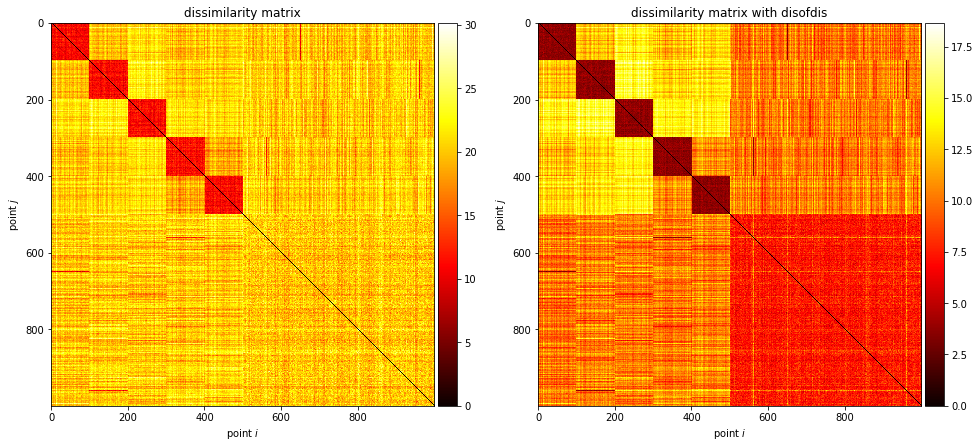

In [27]:
# Visualize the dissimilarity matrix 
fig, axa = plt.subplots(1,2, figsize=(16,8))
axa[0].set_title('dissimilarity matrix');axa[0].set_xlabel('point $\it{i}$');axa[0].set_ylabel('point $\it{j}$')
im1 = axa[0].imshow(sim_distances, cmap='hot', interpolation='nearest', aspect='equal');
axa[1].set_title('dissimilarity matrix with disofdis');axa[1].set_xlabel('point $\it{i}$');axa[1].set_ylabel('point $\it{j}$')
im2 = axa[1].imshow(ddistances, cmap='hot', interpolation='nearest', aspect='equal');
plt.colorbar(im1,ax=axa[0],cax=make_axes_locatable(axa[0]).append_axes("right", size="5%", pad=0.05))
plt.colorbar(im2,ax=axa[1],cax=make_axes_locatable(axa[1]).append_axes("right", size="5%", pad=0.05))
plt.show()

In [28]:
# TSNE embedding 
embedded_distances = TSNE(n_components=2, metric='precomputed').fit_transform(sim_distances)
embedded_ddistances = TSNE(n_components=2, metric='precomputed').fit_transform(ddistances)

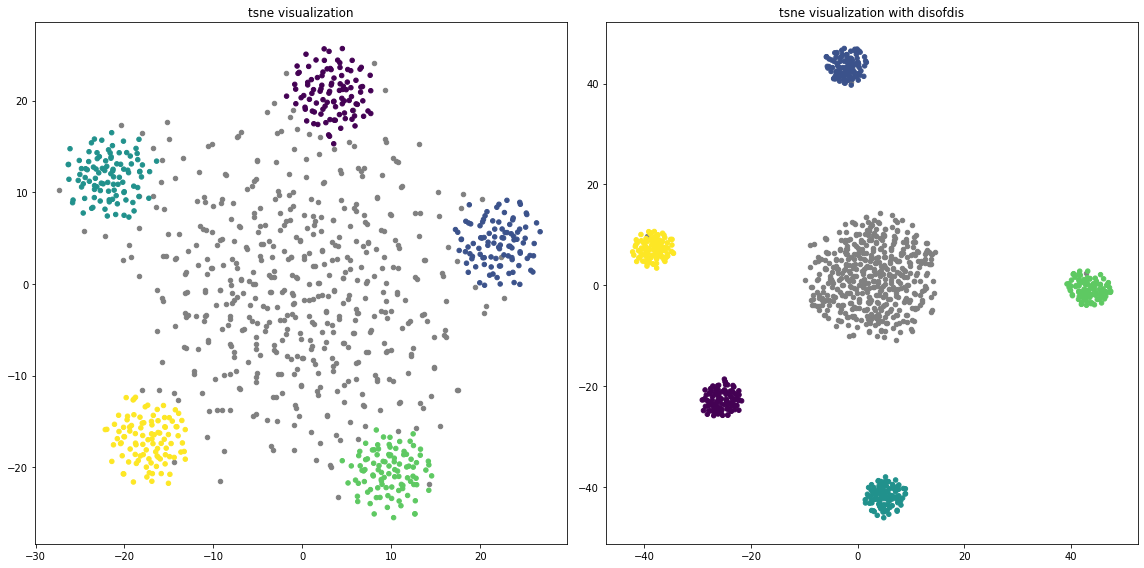

In [29]:
# viusalize the TSNE embedding  
fig, axa = plt.subplots(1,2, figsize=(16,8))
axa[0].scatter(embedded_distances[n_cluster_points:, 0], embedded_distances[n_cluster_points:, 1], c='grey' ,marker='o',s = 20,facecolors='none') 
axa[0].scatter(embedded_distances[:n_cluster_points, 0], embedded_distances[:n_cluster_points, 1], c=y_cluster ,marker='o',s = 20,facecolors='none') 
axa[0].set_title('tsne visualization')
axa[1].scatter(embedded_ddistances[n_cluster_points:, 0], embedded_ddistances[n_cluster_points:, 1], c='grey' ,marker='o',s = 20,facecolors='none') 
axa[1].scatter(embedded_ddistances[:n_cluster_points, 0], embedded_ddistances[:n_cluster_points, 1], c=y_cluster ,marker='o',s = 20,facecolors='none') 
axa[1].set_title('tsne visualization with disofdis')
plt.tight_layout(); plt.show()

We can see that in the 2D tSNE embeddings, that after the Distance-of-distance transformation, the scattering noise points that mask the clusters are attracted together, which facilitates the separation of clusters. 